# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
# tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

True

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2802269396672346864
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18364389173189292984
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10990990132
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 9442495110346900504
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:b1:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12832642932294066300
physical_device_desc: "device: XLA_GPU device"
]


In [8]:
tf.reset_default_graph()

In [9]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 30
env_name = 'Maze11x11'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/blbudima/miniconda3/envs/sgm/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [10]:
# from sgm.trainer import train_eval

# train_eval(agent,
#           tf_env,
#           eval_tf_env,
#           initial_collect_steps=1000,
#           eval_interval=1000,
#           num_eval_episodes=10,
#           num_iterations=30000,
#           save_model_dir=model_dir,
#           experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  2%|▏         | 995/50000 [00:19<14:20, 56.92it/s] 

Saved checkpoint for step 1000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.888232
INFO:tensorflow:56.081 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -21.60
INFO:tensorflow:		 predicted_dist = 20.0 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.90
INFO:tensorflow:		 predicted_dist = 21.3 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 20.7 (1.0)
INFO:tensorflow:	 eval_time = 4.87


  4%|▍         | 1997/50000 [00:42<13:55, 57.44it/s]  

Saved checkpoint for step 2000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 2.038632
INFO:tensorflow:65.152 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.60
INFO:tensorflow:		 predicted_dist = 24.4 (0.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 25.0 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 26.1 (0.6)
INFO:tensorflow:	 eval_time = 4.93


  6%|▌         | 2995/50000 [01:05<13:46, 56.91it/s]  

Saved checkpoint for step 3000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 1.535378
INFO:tensorflow:64.844 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -19.40
INFO:tensorflow:		 predicted_dist = 19.1 (4.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.90
INFO:tensorflow:		 predicted_dist = 23.3 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 24.1 (3.0)
INFO:tensorflow:	 eval_time = 4.16


  8%|▊         | 3994/50000 [01:27<13:16, 57.73it/s]  

Saved checkpoint for step 4000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.889940
INFO:tensorflow:65.342 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -24.60
INFO:tensorflow:		 predicted_dist = 20.5 (3.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -24.50
INFO:tensorflow:		 predicted_dist = 21.9 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.10
INFO:tensorflow:		 predicted_dist = 24.9 (0.9)
INFO:tensorflow:	 eval_time = 4.30


 10%|▉         | 4996/50000 [01:49<13:00, 57.65it/s]  

Saved checkpoint for step 5000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 2.147027
INFO:tensorflow:65.345 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.90
INFO:tensorflow:		 predicted_dist = 20.1 (3.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -21.80
INFO:tensorflow:		 predicted_dist = 24.5 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -29.90
INFO:tensorflow:		 predicted_dist = 25.8 (1.1)
INFO:tensorflow:	 eval_time = 3.79


 12%|█▏        | 5994/50000 [02:10<12:01, 60.99it/s]  

Saved checkpoint for step 6000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 1.941744
INFO:tensorflow:66.192 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -21.90
INFO:tensorflow:		 predicted_dist = 16.0 (3.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -23.80
INFO:tensorflow:		 predicted_dist = 21.8 (2.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.10
INFO:tensorflow:		 predicted_dist = 22.3 (2.4)
INFO:tensorflow:	 eval_time = 3.95


 14%|█▍        | 6998/50000 [02:31<12:17, 58.31it/s]  

Saved checkpoint for step 7000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 2.102128
INFO:tensorflow:66.304 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -22.10
INFO:tensorflow:		 predicted_dist = 19.7 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.70
INFO:tensorflow:		 predicted_dist = 23.0 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.90
INFO:tensorflow:		 predicted_dist = 25.4 (1.0)
INFO:tensorflow:	 eval_time = 4.10


 16%|█▌        | 7994/50000 [02:53<11:57, 58.54it/s]  

Saved checkpoint for step 8000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 1.834721
INFO:tensorflow:65.689 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.90
INFO:tensorflow:		 predicted_dist = 19.0 (3.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -23.30
INFO:tensorflow:		 predicted_dist = 21.9 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -24.50
INFO:tensorflow:		 predicted_dist = 23.9 (1.4)
INFO:tensorflow:	 eval_time = 3.41


 18%|█▊        | 8995/50000 [03:13<11:49, 57.81it/s]  

Saved checkpoint for step 9000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 2.403951
INFO:tensorflow:66.124 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.30
INFO:tensorflow:		 predicted_dist = 19.6 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.20
INFO:tensorflow:		 predicted_dist = 22.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.40
INFO:tensorflow:		 predicted_dist = 24.1 (1.0)
INFO:tensorflow:	 eval_time = 3.59


 20%|█▉        | 9997/50000 [03:34<11:35, 57.49it/s]  

Saved checkpoint for step 10000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 2.252924
INFO:tensorflow:66.344 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.20
INFO:tensorflow:		 predicted_dist = 19.5 (3.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -22.60
INFO:tensorflow:		 predicted_dist = 19.9 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.40
INFO:tensorflow:		 predicted_dist = 23.1 (2.1)
INFO:tensorflow:	 eval_time = 3.58


 22%|██▏       | 10994/50000 [03:55<11:04, 58.74it/s]  

Saved checkpoint for step 11000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 2.418130
INFO:tensorflow:66.116 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.00
INFO:tensorflow:		 predicted_dist = 19.4 (6.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -21.20
INFO:tensorflow:		 predicted_dist = 22.8 (2.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -24.40
INFO:tensorflow:		 predicted_dist = 24.0 (1.3)
INFO:tensorflow:	 eval_time = 3.83


 24%|██▍       | 11997/50000 [04:16<11:08, 56.83it/s]  

Saved checkpoint for step 12000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 2.430398
INFO:tensorflow:66.016 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -10.20
INFO:tensorflow:		 predicted_dist = 15.6 (4.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.10
INFO:tensorflow:		 predicted_dist = 20.0 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -22.10
INFO:tensorflow:		 predicted_dist = 22.4 (1.4)
INFO:tensorflow:	 eval_time = 2.94


 26%|██▌       | 12994/50000 [04:37<10:33, 58.43it/s]  

Saved checkpoint for step 13000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.666057
INFO:tensorflow:65.910 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.60
INFO:tensorflow:		 predicted_dist = 16.4 (3.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.10
INFO:tensorflow:		 predicted_dist = 19.3 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.90
INFO:tensorflow:		 predicted_dist = 21.8 (1.7)
INFO:tensorflow:	 eval_time = 3.36


 28%|██▊       | 13997/50000 [04:58<10:38, 56.39it/s]  

Saved checkpoint for step 14000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.209535
INFO:tensorflow:65.693 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.20
INFO:tensorflow:		 predicted_dist = 13.1 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.10
INFO:tensorflow:		 predicted_dist = 15.8 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 18.8 (0.9)
INFO:tensorflow:	 eval_time = 2.53


 30%|██▉       | 14999/50000 [05:18<13:53, 42.01it/s]  

Saved checkpoint for step 15000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 2.722962
INFO:tensorflow:65.368 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.90
INFO:tensorflow:		 predicted_dist = 11.2 (3.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.00
INFO:tensorflow:		 predicted_dist = 15.5 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -24.60
INFO:tensorflow:		 predicted_dist = 18.6 (0.9)
INFO:tensorflow:	 eval_time = 2.95


 32%|███▏      | 15998/50000 [05:38<09:45, 58.07it/s]  

Saved checkpoint for step 16000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 2.867126
INFO:tensorflow:65.837 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.20
INFO:tensorflow:		 predicted_dist = 11.5 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 16.0 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 18.8 (1.1)
INFO:tensorflow:	 eval_time = 2.40


 34%|███▍      | 16997/50000 [05:58<09:28, 58.04it/s]  

Saved checkpoint for step 17000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 2.846455
INFO:tensorflow:65.516 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 11.8 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 16.0 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.30
INFO:tensorflow:		 predicted_dist = 19.0 (1.1)
INFO:tensorflow:	 eval_time = 2.16


 36%|███▌      | 17999/50000 [06:18<12:38, 42.19it/s]  

Saved checkpoint for step 18000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 2.730248
INFO:tensorflow:65.501 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.90
INFO:tensorflow:		 predicted_dist = 11.6 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.40
INFO:tensorflow:		 predicted_dist = 15.4 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.30
INFO:tensorflow:		 predicted_dist = 18.4 (1.6)
INFO:tensorflow:	 eval_time = 2.37


 38%|███▊      | 18994/50000 [06:38<09:02, 57.17it/s]  

Saved checkpoint for step 19000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 3.473445
INFO:tensorflow:65.250 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 7.3 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.40
INFO:tensorflow:		 predicted_dist = 12.8 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.20
INFO:tensorflow:		 predicted_dist = 16.5 (2.0)
INFO:tensorflow:	 eval_time = 2.18


 40%|███▉      | 19995/50000 [06:57<08:42, 57.43it/s]  

Saved checkpoint for step 20000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 3.320510
INFO:tensorflow:65.567 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.80
INFO:tensorflow:		 predicted_dist = 6.8 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 11.7 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 14.7 (2.5)
INFO:tensorflow:	 eval_time = 2.19


 42%|████▏     | 20997/50000 [07:17<08:18, 58.20it/s]  

Saved checkpoint for step 21000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 3.076269
INFO:tensorflow:65.083 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 5.8 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 11.3 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -21.70
INFO:tensorflow:		 predicted_dist = 14.7 (1.4)
INFO:tensorflow:	 eval_time = 2.48


 44%|████▍     | 21997/50000 [07:37<08:02, 58.01it/s]  

Saved checkpoint for step 22000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.177937
INFO:tensorflow:65.273 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.50
INFO:tensorflow:		 predicted_dist = 6.5 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.10
INFO:tensorflow:		 predicted_dist = 11.3 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.80
INFO:tensorflow:		 predicted_dist = 14.5 (1.4)
INFO:tensorflow:	 eval_time = 2.14


 46%|████▌     | 22995/50000 [07:57<07:53, 57.03it/s]  

Saved checkpoint for step 23000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.261346
INFO:tensorflow:65.726 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 6.7 (2.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 10.6 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 13.7 (2.4)
INFO:tensorflow:	 eval_time = 2.16


 48%|████▊     | 23997/50000 [08:17<07:31, 57.57it/s]

Saved checkpoint for step 24000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 3.303697
INFO:tensorflow:65.245 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 8.3 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 11.0 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 14.4 (1.4)
INFO:tensorflow:	 eval_time = 2.31


 50%|████▉     | 24999/50000 [08:37<09:47, 42.57it/s]  

Saved checkpoint for step 25000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 3.341179
INFO:tensorflow:65.177 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 5.7 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 8.2 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 12.4 (2.2)
INFO:tensorflow:	 eval_time = 2.29


 52%|█████▏    | 25996/50000 [08:56<07:05, 56.38it/s]

Saved checkpoint for step 26000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.847508
INFO:tensorflow:65.481 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 6.6 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 10.9 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 14.1 (1.5)
INFO:tensorflow:	 eval_time = 2.33


 54%|█████▍    | 26998/50000 [09:16<06:47, 56.40it/s]

Saved checkpoint for step 27000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 3.696994
INFO:tensorflow:64.951 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 6.1 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.70
INFO:tensorflow:		 predicted_dist = 9.7 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 13.8 (2.0)
INFO:tensorflow:	 eval_time = 2.21


 56%|█████▌    | 27999/50000 [09:36<08:49, 41.55it/s]

Saved checkpoint for step 28000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 3.434770
INFO:tensorflow:65.177 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 4.8 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.20
INFO:tensorflow:		 predicted_dist = 8.8 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.90
INFO:tensorflow:		 predicted_dist = 12.6 (0.6)
INFO:tensorflow:	 eval_time = 2.42


 58%|█████▊    | 28998/50000 [09:56<06:14, 56.12it/s]

Saved checkpoint for step 29000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 3.792610
INFO:tensorflow:65.271 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.60
INFO:tensorflow:		 predicted_dist = 6.0 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 9.1 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 12.4 (1.2)
INFO:tensorflow:	 eval_time = 2.14


 60%|█████▉    | 29994/50000 [10:16<05:49, 57.28it/s]

Saved checkpoint for step 30000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 3.285640
INFO:tensorflow:65.259 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 4.4 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 8.9 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.30
INFO:tensorflow:		 predicted_dist = 12.8 (0.9)
INFO:tensorflow:	 eval_time = 2.19


 62%|██████▏   | 30997/50000 [10:35<05:28, 57.89it/s]

Saved checkpoint for step 31000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-31
INFO:tensorflow:step = 31000, loss = 3.287060
INFO:tensorflow:65.520 steps/sec
INFO:tensorflow:step = 31000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.50
INFO:tensorflow:		 predicted_dist = 5.2 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.10
INFO:tensorflow:		 predicted_dist = 9.7 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.50
INFO:tensorflow:		 predicted_dist = 13.5 (0.7)
INFO:tensorflow:	 eval_time = 2.34


 64%|██████▍   | 31995/50000 [10:55<05:18, 56.59it/s]

Saved checkpoint for step 32000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-32
INFO:tensorflow:step = 32000, loss = 3.726443
INFO:tensorflow:65.610 steps/sec
INFO:tensorflow:step = 32000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.30
INFO:tensorflow:		 predicted_dist = 5.8 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 8.6 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.70
INFO:tensorflow:		 predicted_dist = 14.7 (2.1)
INFO:tensorflow:	 eval_time = 2.39


 66%|██████▌   | 32997/50000 [11:15<05:00, 56.64it/s]

Saved checkpoint for step 33000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-33
INFO:tensorflow:step = 33000, loss = 3.001618
INFO:tensorflow:65.154 steps/sec
INFO:tensorflow:step = 33000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 6.0 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 10.3 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.10
INFO:tensorflow:		 predicted_dist = 13.7 (2.5)
INFO:tensorflow:	 eval_time = 2.28


 68%|██████▊   | 33994/50000 [11:35<04:37, 57.70it/s]

Saved checkpoint for step 34000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-34
INFO:tensorflow:step = 34000, loss = 3.566688
INFO:tensorflow:65.624 steps/sec
INFO:tensorflow:step = 34000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 6.7 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 10.8 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 14.2 (1.6)
INFO:tensorflow:	 eval_time = 2.29


 70%|██████▉   | 34999/50000 [11:55<06:01, 41.50it/s]

Saved checkpoint for step 35000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-35
INFO:tensorflow:step = 35000, loss = 4.163442
INFO:tensorflow:65.698 steps/sec
INFO:tensorflow:step = 35000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 5.1 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.10
INFO:tensorflow:		 predicted_dist = 9.8 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.00
INFO:tensorflow:		 predicted_dist = 14.3 (2.0)
INFO:tensorflow:	 eval_time = 2.10


 72%|███████▏  | 35994/50000 [12:14<04:02, 57.78it/s]

Saved checkpoint for step 36000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-36
INFO:tensorflow:step = 36000, loss = 3.892497
INFO:tensorflow:65.371 steps/sec
INFO:tensorflow:step = 36000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 6.5 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.50
INFO:tensorflow:		 predicted_dist = 11.1 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.90
INFO:tensorflow:		 predicted_dist = 16.6 (2.4)
INFO:tensorflow:	 eval_time = 2.13


 74%|███████▍  | 36997/50000 [12:34<03:46, 57.39it/s]

Saved checkpoint for step 37000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-37
INFO:tensorflow:step = 37000, loss = 3.414629
INFO:tensorflow:65.787 steps/sec
INFO:tensorflow:step = 37000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 6.3 (2.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 9.3 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 14.6 (1.9)
INFO:tensorflow:	 eval_time = 2.38


 76%|███████▌  | 37999/50000 [12:54<05:02, 39.71it/s]

Saved checkpoint for step 38000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-38
INFO:tensorflow:step = 38000, loss = 3.474151
INFO:tensorflow:65.156 steps/sec
INFO:tensorflow:step = 38000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 5.0 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 9.6 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 14.9 (2.0)
INFO:tensorflow:	 eval_time = 2.30


 78%|███████▊  | 38994/50000 [13:14<03:08, 58.45it/s]

Saved checkpoint for step 39000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-39
INFO:tensorflow:step = 39000, loss = 3.577680
INFO:tensorflow:65.645 steps/sec
INFO:tensorflow:step = 39000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 4.6 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 8.3 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.30
INFO:tensorflow:		 predicted_dist = 13.1 (1.1)
INFO:tensorflow:	 eval_time = 2.27


 80%|███████▉  | 39998/50000 [13:34<02:56, 56.57it/s]

Saved checkpoint for step 40000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-40
INFO:tensorflow:step = 40000, loss = 3.546204
INFO:tensorflow:65.553 steps/sec
INFO:tensorflow:step = 40000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 4.4 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.30
INFO:tensorflow:		 predicted_dist = 9.2 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 13.0 (1.5)
INFO:tensorflow:	 eval_time = 2.14


 82%|████████▏ | 40997/50000 [13:53<02:34, 58.38it/s]

Saved checkpoint for step 41000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-41
INFO:tensorflow:step = 41000, loss = 3.244061
INFO:tensorflow:65.517 steps/sec
INFO:tensorflow:step = 41000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 5.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 9.1 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 13.2 (1.7)
INFO:tensorflow:	 eval_time = 2.19


 84%|████████▍ | 41994/50000 [14:13<02:19, 57.46it/s]

Saved checkpoint for step 42000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-42
INFO:tensorflow:step = 42000, loss = 3.421062
INFO:tensorflow:65.600 steps/sec
INFO:tensorflow:step = 42000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 5.4 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 9.3 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 13.9 (1.4)
INFO:tensorflow:	 eval_time = 2.65


 86%|████████▌ | 42997/50000 [14:33<01:59, 58.68it/s]

Saved checkpoint for step 43000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-43
INFO:tensorflow:step = 43000, loss = 3.277990
INFO:tensorflow:66.095 steps/sec
INFO:tensorflow:step = 43000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 4.2 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.40
INFO:tensorflow:		 predicted_dist = 8.8 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.10
INFO:tensorflow:		 predicted_dist = 12.2 (1.9)
INFO:tensorflow:	 eval_time = 2.30


 88%|████████▊ | 43996/50000 [14:53<01:42, 58.31it/s]

Saved checkpoint for step 44000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-44
INFO:tensorflow:step = 44000, loss = 3.323776
INFO:tensorflow:65.727 steps/sec
INFO:tensorflow:step = 44000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 5.9 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.30
INFO:tensorflow:		 predicted_dist = 8.8 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 13.6 (2.2)
INFO:tensorflow:	 eval_time = 2.09


 90%|████████▉ | 44994/50000 [15:12<01:26, 58.01it/s]

Saved checkpoint for step 45000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-45
INFO:tensorflow:step = 45000, loss = 3.232605
INFO:tensorflow:65.668 steps/sec
INFO:tensorflow:step = 45000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 6.3 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 9.5 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 13.1 (1.0)
INFO:tensorflow:	 eval_time = 2.23


 92%|█████████▏| 45999/50000 [15:32<01:24, 47.30it/s]

Saved checkpoint for step 46000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-46
INFO:tensorflow:step = 46000, loss = 3.635308
INFO:tensorflow:65.858 steps/sec
INFO:tensorflow:step = 46000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 6.0 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 10.2 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.70
INFO:tensorflow:		 predicted_dist = 14.7 (1.2)
INFO:tensorflow:	 eval_time = 2.18


 94%|█████████▍| 46998/50000 [15:51<00:51, 58.52it/s]

Saved checkpoint for step 47000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-47
INFO:tensorflow:step = 47000, loss = 4.320132
INFO:tensorflow:65.640 steps/sec
INFO:tensorflow:step = 47000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 5.1 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.40
INFO:tensorflow:		 predicted_dist = 10.4 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 13.8 (2.2)
INFO:tensorflow:	 eval_time = 2.16


 96%|█████████▌| 47994/50000 [16:11<00:34, 57.55it/s]

Saved checkpoint for step 48000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-48
INFO:tensorflow:step = 48000, loss = 2.991493
INFO:tensorflow:65.656 steps/sec
INFO:tensorflow:step = 48000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 5.3 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 8.9 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.70
INFO:tensorflow:		 predicted_dist = 14.7 (2.8)
INFO:tensorflow:	 eval_time = 2.21


 98%|█████████▊| 48997/50000 [16:31<00:17, 56.80it/s]

Saved checkpoint for step 49000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-49
INFO:tensorflow:step = 49000, loss = 3.385159
INFO:tensorflow:65.465 steps/sec
INFO:tensorflow:step = 49000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 6.1 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 8.5 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.60
INFO:tensorflow:		 predicted_dist = 12.3 (1.5)
INFO:tensorflow:	 eval_time = 2.17


100%|█████████▉| 49998/50000 [16:51<00:00, 55.39it/s]

Saved checkpoint for step 50000: /home/blbudima/sgm/notebooks/../agents/thinned_maze11x11/Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/ckpt-50
INFO:tensorflow:step = 50000, loss = 3.321650
INFO:tensorflow:63.919 steps/sec
INFO:tensorflow:step = 50000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 6.2 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 10.1 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.10
INFO:tensorflow:		 predicted_dist = 15.0 (1.9)
INFO:tensorflow:	 eval_time = 2.44


100%|██████████| 50000/50000 [16:54<00:00, 49.31it/s]


LossInfo(loss=<tf.Tensor: id=1915546, shape=(), dtype=float32, numpy=3.3216496>, extra=(<tf.Tensor: id=1915547, shape=(), dtype=float32, numpy=0.9328488>, <tf.Tensor: id=1915548, shape=(), dtype=float32, numpy=2.3888006>))

# Load trained model into agent

In [11]:
filename = "Maze11x11_coordinate_30steps-May-11-2021-01-12-41-AM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [12]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=10)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

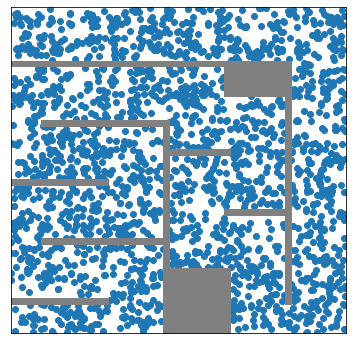

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [14]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

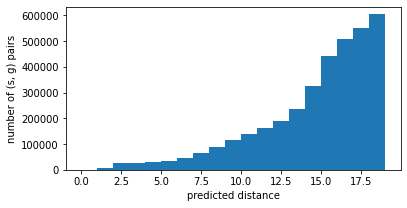

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 270 nodes and 1872 edges


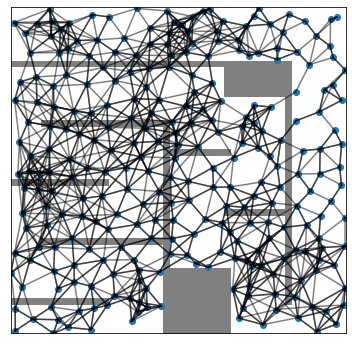

In [16]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 1588 edges


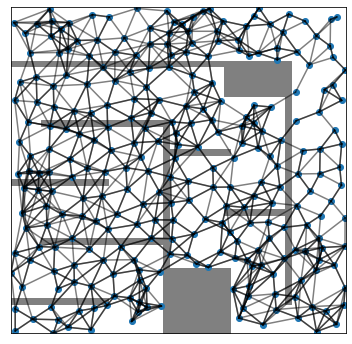

In [17]:
search_policy.keep_k_nearest(7)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 1435 edges


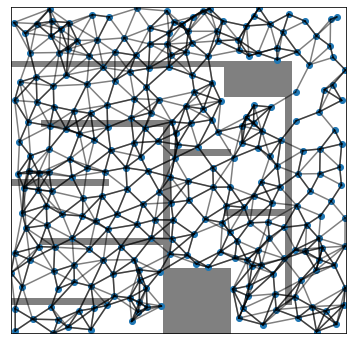

In [18]:
search_policy.keep_k_nearest(6)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 1246 edges


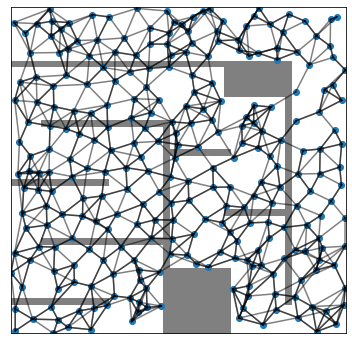

In [19]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 1030 edges


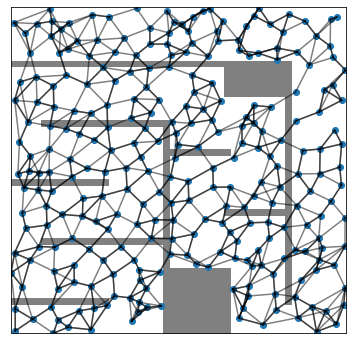

In [20]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 791 edges


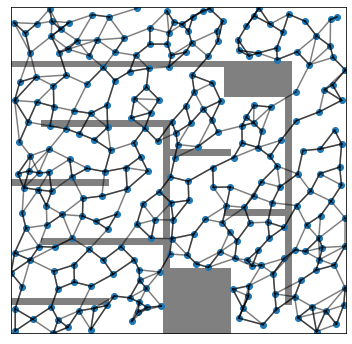

In [21]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 535 edges


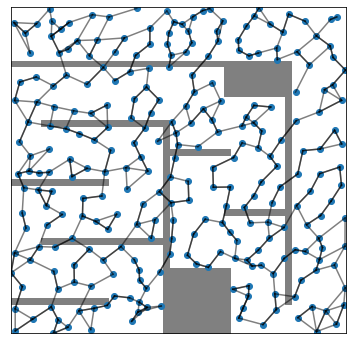

In [22]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 270 edges


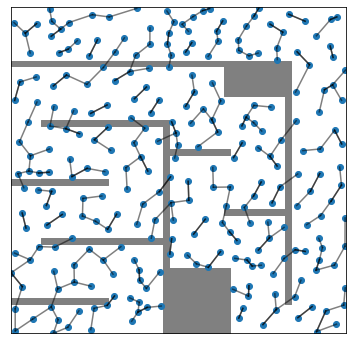

In [23]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

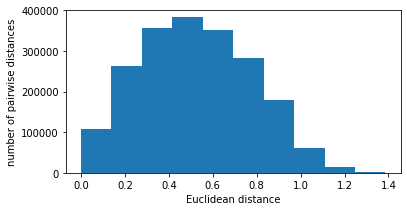

In [24]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [25]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

# Cleanup and evaluate SGM

In [26]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.00
Evaluated initial SGM success rate in 520.12 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 896.73 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 886.12 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 888.72 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 869.04 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 872.04 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 847.85 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.00
Took 5000 c

# Load cleanup graphs

In [27]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

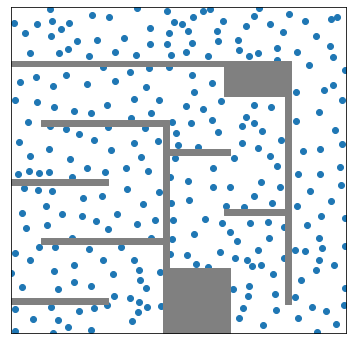

In [28]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 1872 edges


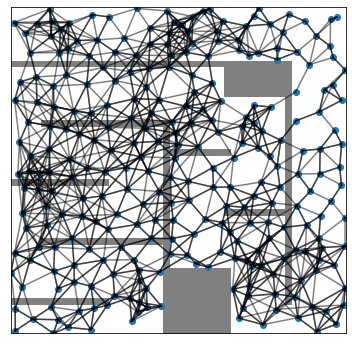

In [29]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 1246 edges


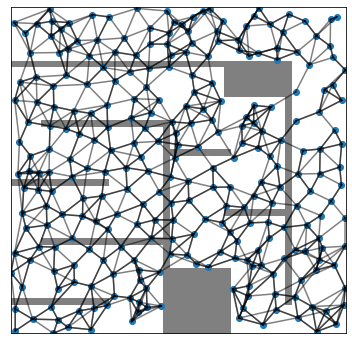

In [30]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 1162 edges


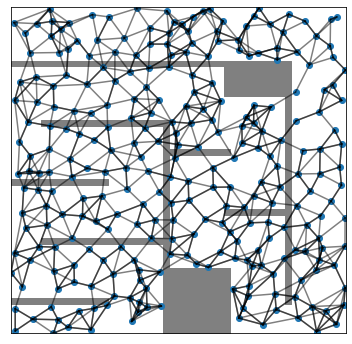

In [31]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 270 nodes and 84 edges


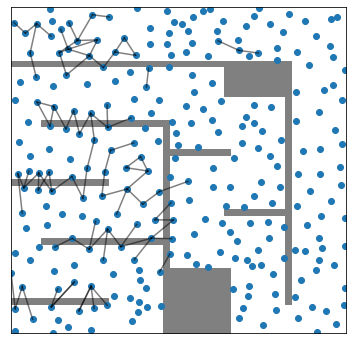

In [32]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)